In [4]:
import pandas as pd

data = pd.read_csv('ready_dataset_traffic_accident.csv', sep=";")
data.head()

,age,gender,driving_exp,weather,severity
0,18-30,Male,1-2yr,Normal,1
1,31-50,Male,Above 10yr,Normal,1
2,18-30,Male,1-2yr,Normal,2
3,18-30,Male,5-10yr,Normal,1
4,18-30,Male,2-5yr,Normal,1


In [5]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, dtype=int)
data[["18-30", "31-50", "Over 51", "Under 18"]] = ohe.fit_transform(data[["age"]])
data[["Male", "Female"]] = ohe.fit_transform(data[["gender"]])
data[["1-2yr", "2-5yr", "5-10yr", "Above 10yr", "Below 1yr", "No License"]] = ohe.fit_transform(data[["driving_exp"]])
data[["Cloudy", "Fog or mist", "Normal", "Other", "Raining", "Raining and Windy", "Snow", "Windy"]] = ohe.fit_transform(data[["weather"]])
data.dropna()
data

c:\Users\Arsyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Arsyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Arsyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Arsyad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\prepro

,age,gender,driving_exp,weather,severity,18-30,31-50,Over 51,Under 18,Male,...,Below 1yr,No License,Cloudy,Fog or mist,Normal,Other,Raining,Raining and Windy,Snow,Windy
0,18-30,Male,1-2yr,Normal,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,31-50,Male,Above 10yr,Normal,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,18-30,Male,1-2yr,Normal,2,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,18-30,Male,5-10yr,Normal,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,18-30,Male,2-5yr,Normal,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9660,31-50,Female,5-10yr,Normal,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9661,31-50,Male,2-5yr,Normal,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9662,Over 51,Male,5-10yr,Normal,2,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9663,18-30,Female,Above 10yr,Normal,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
data.isnull().values.any()

In [6]:
X = data[["18-30", "31-50", "Over 51", "Under 18", "Male", "Female", "1-2yr", "2-5yr", "5-10yr", "Above 10yr", "Below 1yr", "No License", "Cloudy", "Fog or mist", "Normal", "Other", "Raining", "Raining and Windy", "Snow", "Windy"]]
y = data[["severity"]]

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# X_train


In [124]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 2, random_state = 0, class_weight="balanced")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6748034753827058

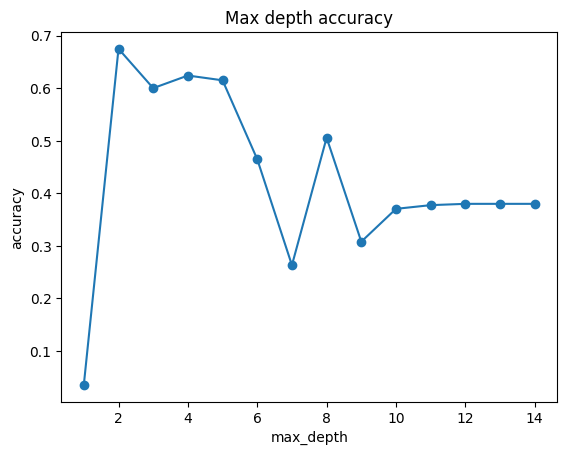

In [123]:
import matplotlib.pyplot as plt
# List of values to try for max_depth:
loop_range = range(1,15)
max_depth_range = list(loop_range)
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0, class_weight="balanced")
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

plt.plot(loop_range, accuracy, marker='o')
plt.title('Max depth accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()


In [114]:
model.predict(X_test)

array([3, 2, 1, ..., 1, 1, 3], dtype=int64)

In [125]:
y_pred = model.predict(X_test)
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average="weighted")

0.6944100623927302